In [4]:
# pip install pandas

In [8]:
import pandas as pd
import os
import numpy as np

current_dir = os.getcwd()
file_name = "Cleaned_Datasets/post-intervention_reponse_0518_filled.csv"
file_path = os.path.join(current_dir, file_name)
df = pd.read_csv(file_path)

In [9]:
df

,Participant Private ID,randomiser-7gnq,1. Age object-3 Response,2. Gender object-4 Response,3. Hispanic/Latino object-6 Response,4. Identify Race object-8 Response,5. Level of Education object-15 Response,6. Income object-10 Response,7. Location object-11 Response,8. How often object-12 Response,perceived_decision_pressure,perceived_authenticity_of_product,perceived_cue_influence,decision_confidence,perceived_manipulativeness
0,13397789.0,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,2,5,5,4,3
1,13397990.0,Scarcity,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","$20,000–$39,999",Yes,Multiple times a week,2,4,2,6,6
2,13398020.0,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","$20,000–$39,999",Yes,Multiple times a week,2,5,1,7,4
3,13398032.0,No Cue,18–24 years old,Male,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Multiple times a week,3,2,5,5,3
4,13398039.0,Popularity,18–24 years old,Male,No,Asian,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",Yes,Once a week,1,3,3,6,3
5,13398111.0,Scarcity,25–34 years old,Female,No,White,"Bachelor's degree (e.g., BA, BS)","$80,000–$99,999",Yes,Once a week,1,4,2,5,3
6,13398130.0,Popularity,25–34 years old,Male,No,Asian,"Master's degree (e.g., MA, MS, MBA)","$100,000–$149,999",Yes,2–3 times a month,1,5,1,6,5
7,13398163.0,No Cue,25–34 years old,Female,No,White,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",Yes,Less than once a month,1,5,1,6,3
8,13398242.0,P+S,18–24 years old,Female,No,Asian,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",Yes,Multiple times a week,5,4,2,6,6
9,13398264.0,Scarcity,18–24 years old,Male,No,Asian,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",Yes,About once a month,5,5,5,5,6


In [10]:
df_analysis = df.copy()
df_analysis = df_analysis.drop(columns='7. Location object-11 Response')
df_analysis = df_analysis.rename(columns={
    "randomiser-7gnq": "cue",
    "1. Age object-3 Response": "age",
    "2. Gender object-4 Response": "gender",
    "3. Hispanic/Latino object-6 Response": "hispanic",
    "4. Identify Race object-8 Response": "race",
    "5. Level of Education object-15 Response": "education",
    "6. Income object-10 Response": "income",
    "8. How often object-12 Response": "shoppingfreq"
})

In [11]:
df_analysis.columns

Index(['Participant Private ID', 'cue', 'age', 'gender', 'hispanic', 'race',
       'education', 'income', 'shoppingfreq', 'perceived_decision_pressure',
       'perceived_authenticity_of_product', 'perceived_cue_influence',
       'decision_confidence', 'perceived_manipulativeness'],
      dtype='object')

In [12]:
df_analysis.info()
df_analysis.describe(include='all')  # Categorical + numeric
df_analysis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Participant Private ID             41 non-null     float64
 1   cue                                41 non-null     object 
 2   age                                41 non-null     object 
 3   gender                             41 non-null     object 
 4   hispanic                           41 non-null     object 
 5   race                               41 non-null     object 
 6   education                          41 non-null     object 
 7   income                             41 non-null     object 
 8   shoppingfreq                       41 non-null     object 
 9   perceived_decision_pressure        41 non-null     int64  
 10  perceived_authenticity_of_product  41 non-null     int64  
 11  perceived_cue_influence            41 non-null     int64  
 

Participant Private ID               0
cue                                  0
age                                  0
gender                               0
hispanic                             0
race                                 0
education                            0
income                               0
shoppingfreq                         0
perceived_decision_pressure          0
perceived_authenticity_of_product    0
perceived_cue_influence              0
decision_confidence                  0
perceived_manipulativeness           0
dtype: int64

### Sample Characteristics

In [41]:
# pip install seaborn

            Count  Percentage
cue                          
P+S            11        26.8
Scarcity       11        26.8
No Cue         10        24.4
Popularity      9        22.0


/var/folders/7h/mx7nc7vj63551qp5lczzf1lr0000gn/T/ipykernel_64086/1990776836.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="cue", data=df_analysis, palette="Set2", edgecolor="black")


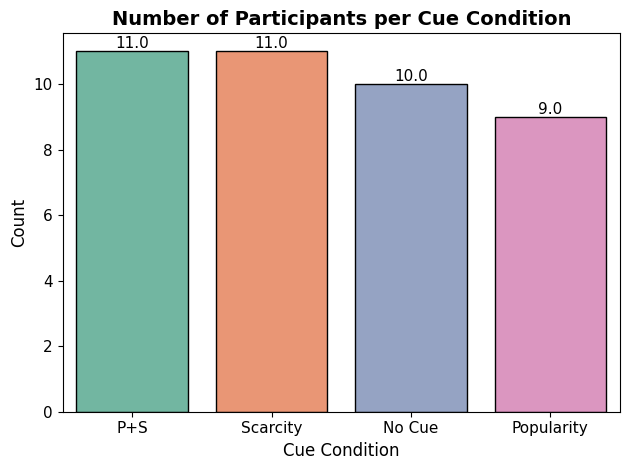

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sample number and proportion
cue_counts = df_analysis['cue'].value_counts()
cue_percent = df_analysis['cue'].value_counts(normalize=True) * 100
cue_summary = pd.DataFrame({'Count': cue_counts, 'Percentage': cue_percent.round(1)})
print(cue_summary)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="cue", data=df_analysis, palette="Set2", edgecolor="black")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.title("Number of Participants per Cue Condition", fontsize=14, weight='bold')
plt.xlabel("Cue Condition", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

### Demographics


--- AGE ---
age
18–24 years old    29
25–34 years old    12
Name: count, dtype: int64


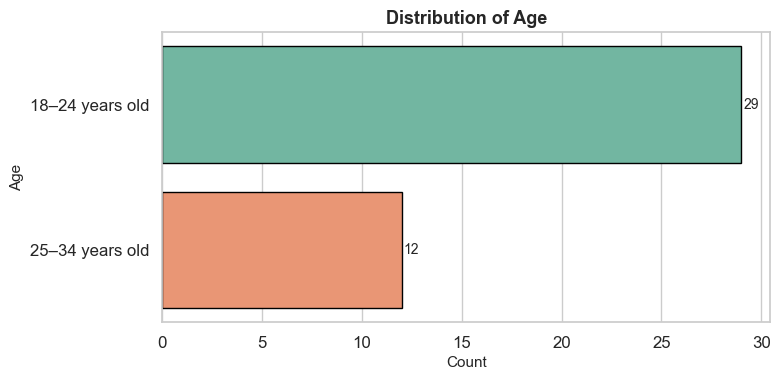


--- GENDER ---
gender
Female                       28
Male                         11
Prefer not to say             1
Non-binary / Third gender     1
Name: count, dtype: int64


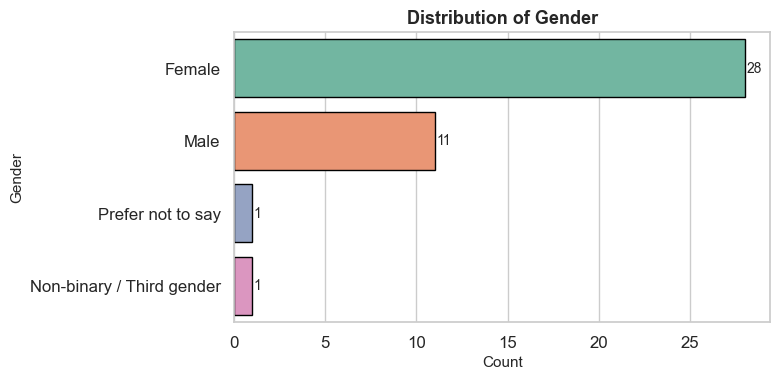


--- HISPANIC ---
hispanic
No    41
Name: count, dtype: int64


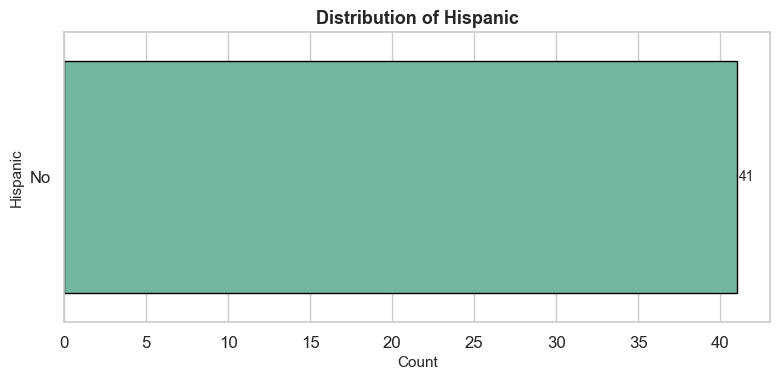


--- RACE ---
race
Asian                        33
White                         6
Black or African American     2
Name: count, dtype: int64


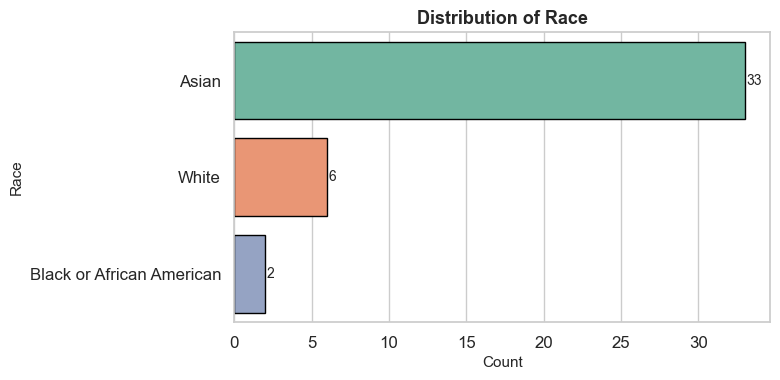


--- EDUCATION ---
education
Bachelor's degree (e.g., BA, BS)                        23
Master's degree (e.g., MA, MS, MBA)                     16
High school diploma or equivalent (e.g., GED)            1
Doctorate or professional degree (e.g., PhD, JD, MD)     1
Name: count, dtype: int64


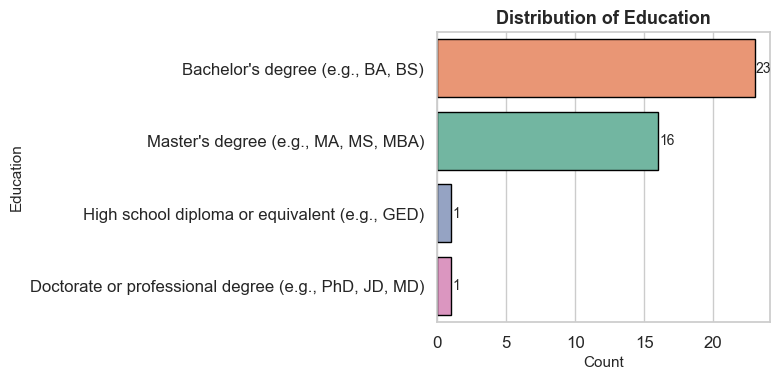


--- INCOME ---
income
Less than $20,000    26
$20,000–$39,999       7
$80,000–$99,999       5
$100,000–$149,999     2
$40,000–$59,999       1
Name: count, dtype: int64


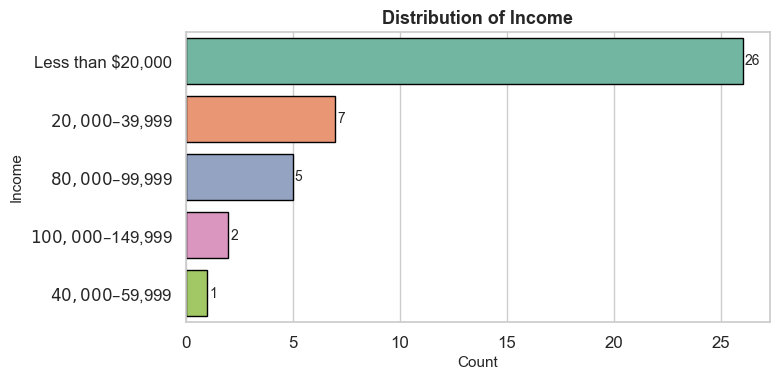


--- SHOPPINGFREQ ---
shoppingfreq
About once a month        13
2–3 times a month         11
Multiple times a week      8
Once a week                5
Less than once a month     4
Name: count, dtype: int64


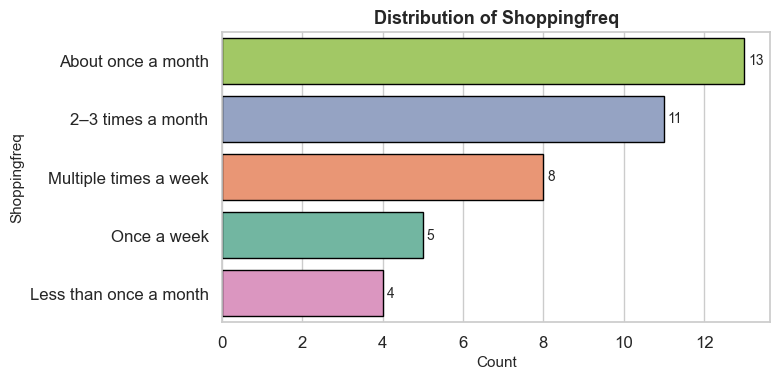

In [19]:
demo_vars = ['age', 'gender', 'hispanic', 'race', 'education', 'income', 'shoppingfreq']

sns.set_theme(style="whitegrid", palette="Set2", font_scale=1.1)

for var in demo_vars:
    print(f"\n--- {var.upper()} ---")
    vc = df_analysis[var].value_counts()
    print(vc)

    plt.figure(figsize=(8, 4))
    ax = sns.countplot(y=var, data=df_analysis, order=vc.index, hue=var, palette="Set2", edgecolor="black")

    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(f'{count}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                    va='center', fontsize=10)

    plt.title(f"Distribution of {var.capitalize()}", fontsize=13, weight='bold')
    plt.xlabel("Count", fontsize=11)
    plt.ylabel(var.capitalize(), fontsize=11)
    plt.tight_layout()
    plt.show()


### Dependent Measures

In [20]:
outcomes = [
    'perceived_decision_pressure',
    'perceived_authenticity_of_product',
    'perceived_cue_influence',
    'decision_confidence',
    'perceived_manipulativeness'
]

print(df_analysis[outcomes].describe())

       perceived_decision_pressure  perceived_authenticity_of_product  \
count                    41.000000                          41.000000   
mean                      2.390244                           3.853659   
std                       1.357904                           1.256204   
min                       1.000000                           2.000000   
25%                       1.000000                           3.000000   
50%                       2.000000                           4.000000   
75%                       3.000000                           5.000000   
max                       6.000000                           6.000000   

       perceived_cue_influence  decision_confidence  \
count                41.000000            41.000000   
mean                  3.024390             5.097561   
std                   1.695403             1.428371   
min                   1.000000             2.000000   
25%                   1.000000             4.000000   
50%         

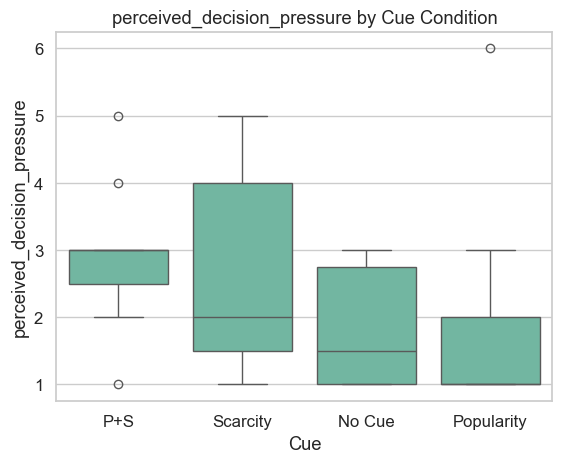

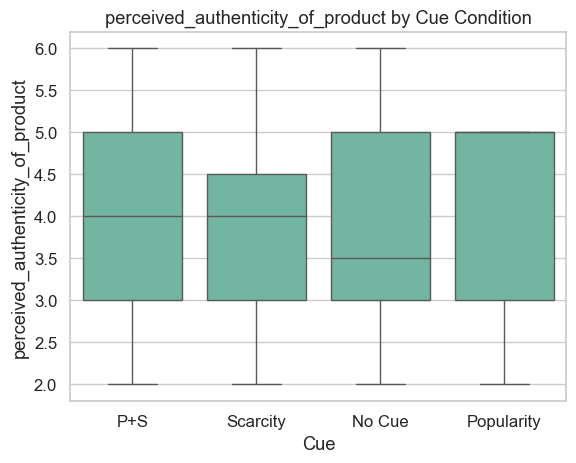

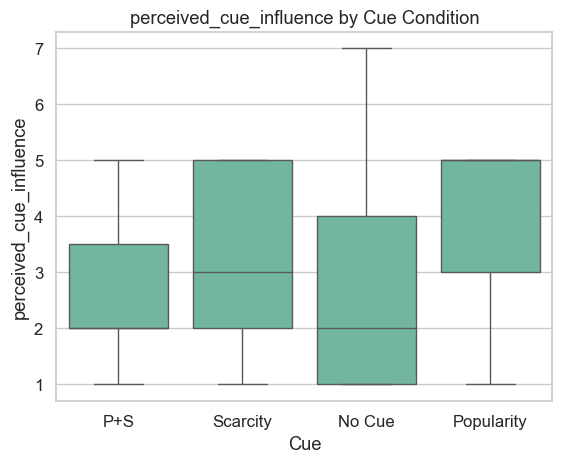

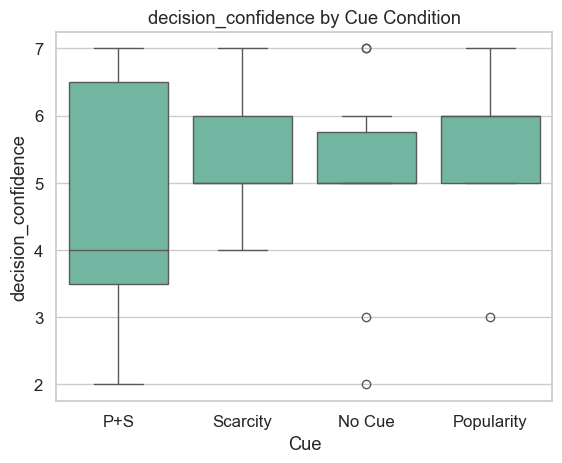

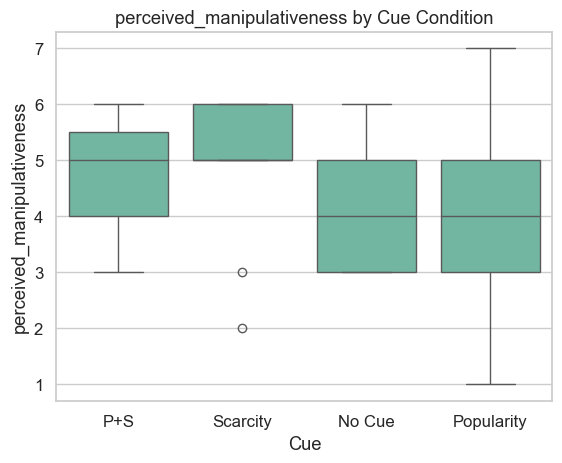

In [21]:
for var in outcomes:
    sns.boxplot(x='cue', y=var, data=df_analysis)
    plt.title(f'{var} by Cue Condition')
    plt.ylabel(var)
    plt.xlabel('Cue')
    plt.show()


In [58]:
# pip install scipy

In [22]:
from scipy.stats import kruskal

for var in outcomes:
    groups = [group[var].dropna() for name, group in df_analysis.groupby('cue')]
    stat, p = kruskal(*groups)
    print(f"{var}: Kruskal-Wallis H = {stat:.2f}, p = {p:.4f}")


perceived_decision_pressure: Kruskal-Wallis H = 6.53, p = 0.0886
perceived_authenticity_of_product: Kruskal-Wallis H = 0.60, p = 0.8969
perceived_cue_influence: Kruskal-Wallis H = 2.45, p = 0.4838
decision_confidence: Kruskal-Wallis H = 1.50, p = 0.6832
perceived_manipulativeness: Kruskal-Wallis H = 4.05, p = 0.2561


In [23]:
# pip install scikit_posthocs

In [24]:
import scikit_posthocs as sp
import pandas as pd

# Ensure 'cue' is categorical
df_analysis['cue'] = df_analysis['cue'].astype('category')

# Run Dunn's test on perceived_decision_pressure
posthoc = sp.posthoc_dunn(
    df_analysis, 
    val_col='perceived_decision_pressure', 
    group_col='cue', 
    p_adjust='bonferroni'
)

print(posthoc)

              No Cue       P+S  Popularity  Scarcity
No Cue      1.000000  0.222601    1.000000  0.905502
P+S         0.222601  1.000000    0.246570  1.000000
Popularity  1.000000  0.246570    1.000000  0.947185
Scarcity    0.905502  1.000000    0.947185  1.000000


### Exploratory Insights

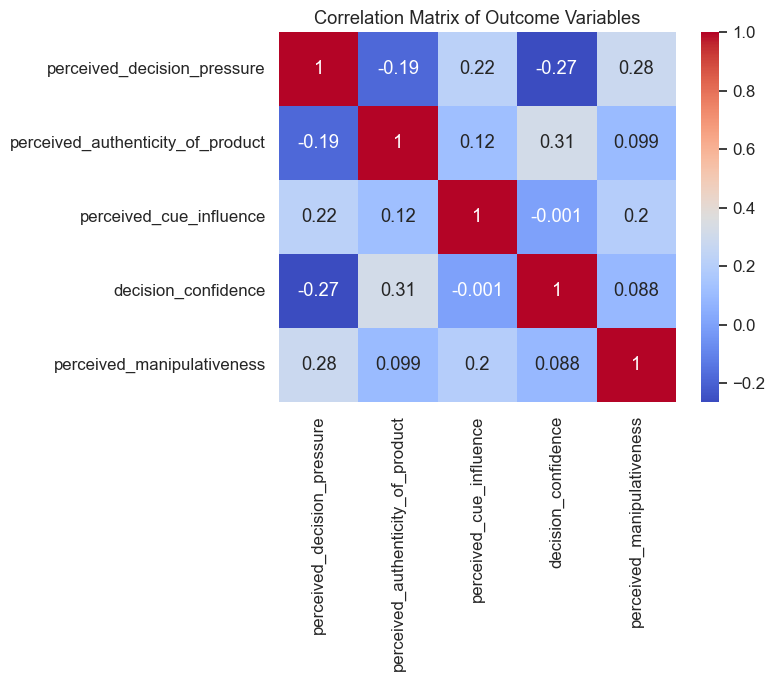

In [35]:
# Correlation Matrix of Outcome Variables
sns.heatmap(df_analysis[outcomes].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Outcome Variables")
plt.show()

| Variable Pair                            | Correlation | Interpretation                                                                                                         |
| ---------------------------------------- | ----------- | ---------------------------------------------------------------------------------------------------------------------- |
| `decision_pressure` & `manipulativeness` | **+0.28**   | Moderate positive relationship: people who feel more pressured also tend to perceive the product as more manipulative. |
| `authenticity` & `confidence`            | **+0.31**   | Weak-moderate positive: products perceived as more authentic also tend to increase confidence.                         |
| Most others                              | \~0 to ±0.2 | Very weak or no linear relationships                                                                                   |


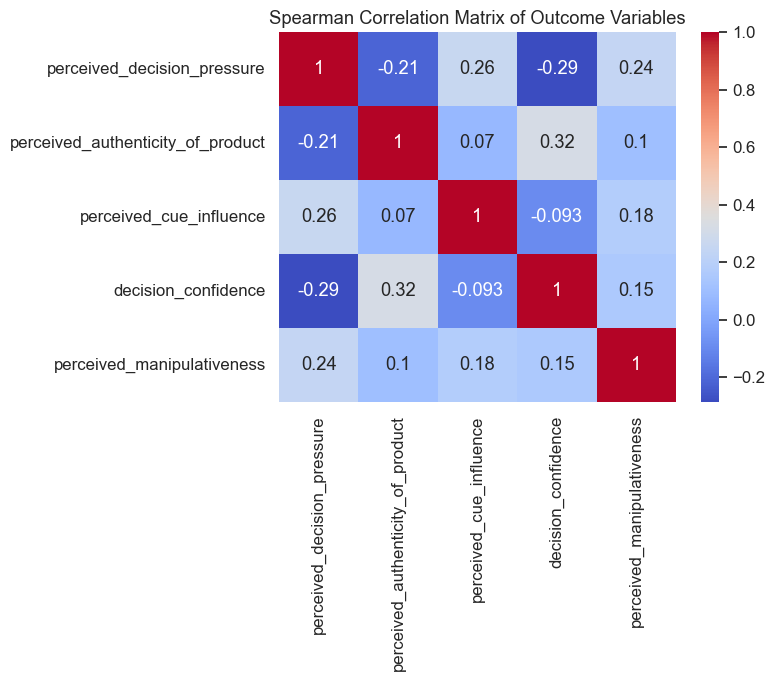

In [26]:
# Compute Spearman correlation
spearman_corr = df_analysis[outcomes].corr(method='spearman')

# Plot heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix of Outcome Variables")
plt.show()


| Variable Pair                            | ρ (Correlation) | Interpretation                                                                                                 |
| ---------------------------------------- | --------------- | -------------------------------------------------------------------------------------------------------------- |
| `decision_pressure` & `manipulativeness` | **+0.24**       | Moderate positive — participants who felt more pressured also tended to find the product more manipulative.    |
| `authenticity` & `confidence`            | **+0.32**       | Weak-to-moderate positive — higher perceived authenticity associated with slightly higher decision confidence. |
| `decision_pressure` & `authenticity`     | **−0.21**       | Weak negative — higher pressure relates to lower perceived authenticity.                                       |
| `decision_pressure` & `cue_influence`    | **+0.26**       | Weak positive — feeling more pressured slightly aligns with greater perceived cue influence.                   |
| Other correlations                       | < ±0.2          | Very weak or no meaningful association.                                                                        |


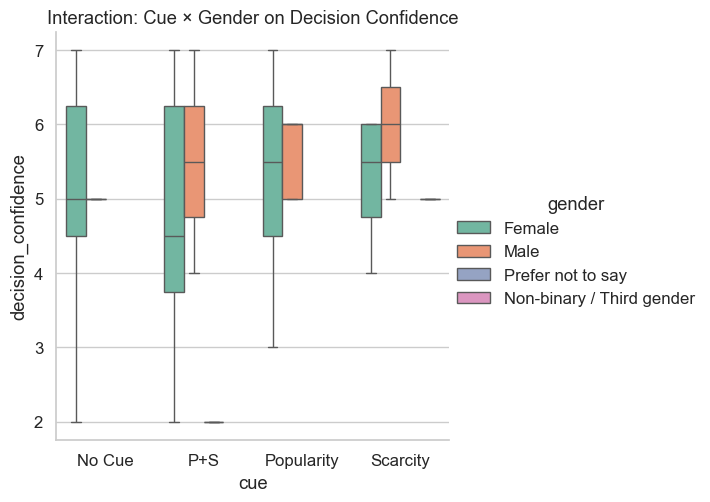

In [27]:
# cue x gender -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='gender', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Gender on Decision Confidence")
plt.show()

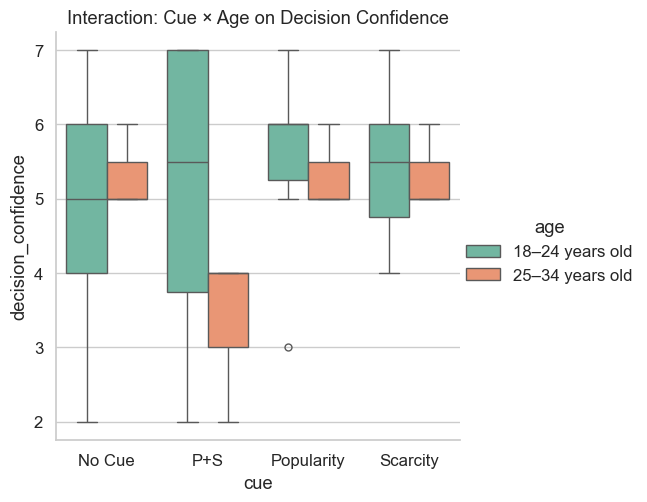

In [28]:
# cue x age -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='age', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Age on Decision Confidence")
plt.show()

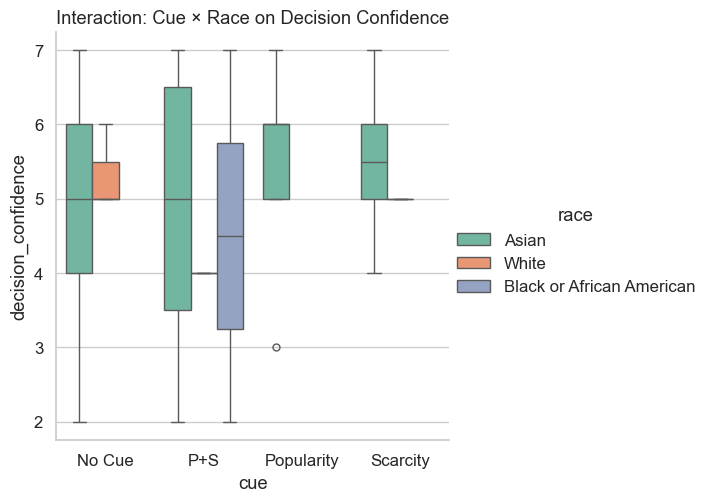

In [29]:
# cue x race -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='race', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Race on Decision Confidence")
plt.show()

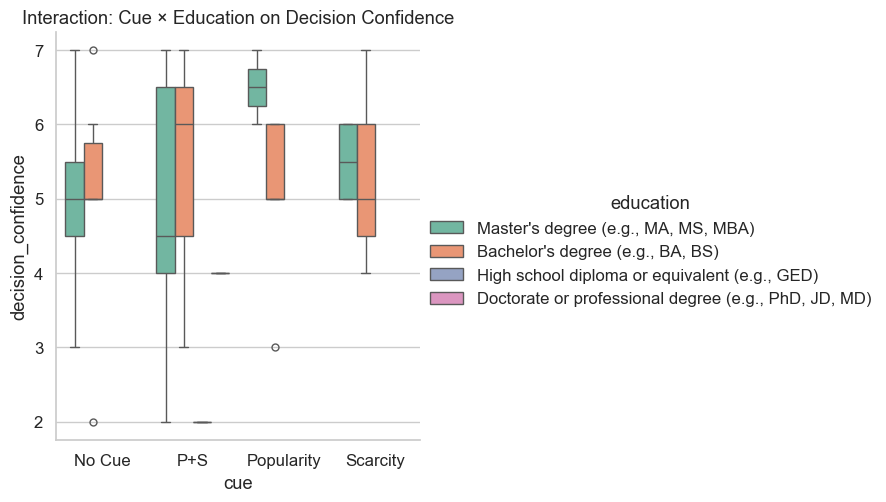

In [30]:
# cue x education -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='education', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Education on Decision Confidence")
plt.show()

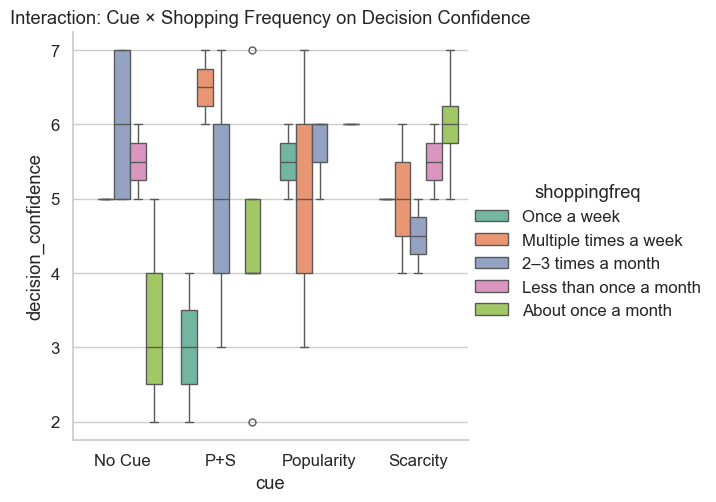

In [31]:
# cue x shoppintfreq -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='shoppingfreq', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Shopping Frequency on Decision Confidence")
plt.show()

In [32]:
# pip install statsmodels patsy

In [33]:
# decision_confidence ~ cue * age

import statsmodels.formula.api as smf

df_analysis['cue'] = df_analysis['cue'].astype('category')
df_analysis['age'] = df_analysis['age'].astype('category')

model = smf.ols('decision_confidence ~ cue * age', data=df_analysis).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     decision_confidence   R-squared:                       0.145
Model:                             OLS   Adj. R-squared:                 -0.036
Method:                  Least Squares   F-statistic:                    0.7997
Date:                 Sun, 18 May 2025   Prob (F-statistic):              0.593
Time:                         15:01:44   Log-Likelihood:                -69.076
No. Observations:                   41   AIC:                             154.2
Df Residuals:                       33   BIC:                             167.9
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [34]:
# decision_confidence ~ cue * shoppingfreq

df_analysis['shoppingfreq'] = df_analysis['shoppingfreq'].astype('category')

model = smf.ols('decision_confidence ~ cue * shoppingfreq', data=df_analysis).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     decision_confidence   R-squared:                       0.424
Model:                             OLS   Adj. R-squared:                  0.039
Method:                  Least Squares   F-statistic:                     1.103
Date:                 Sun, 18 May 2025   Prob (F-statistic):              0.404
Time:                         15:01:45   Log-Likelihood:                -60.991
No. Observations:                   41   AIC:                             156.0
Df Residuals:                       24   BIC:                             185.1
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------